In [2]:
import matplotlib.pyplot as plt
import pandas as pd

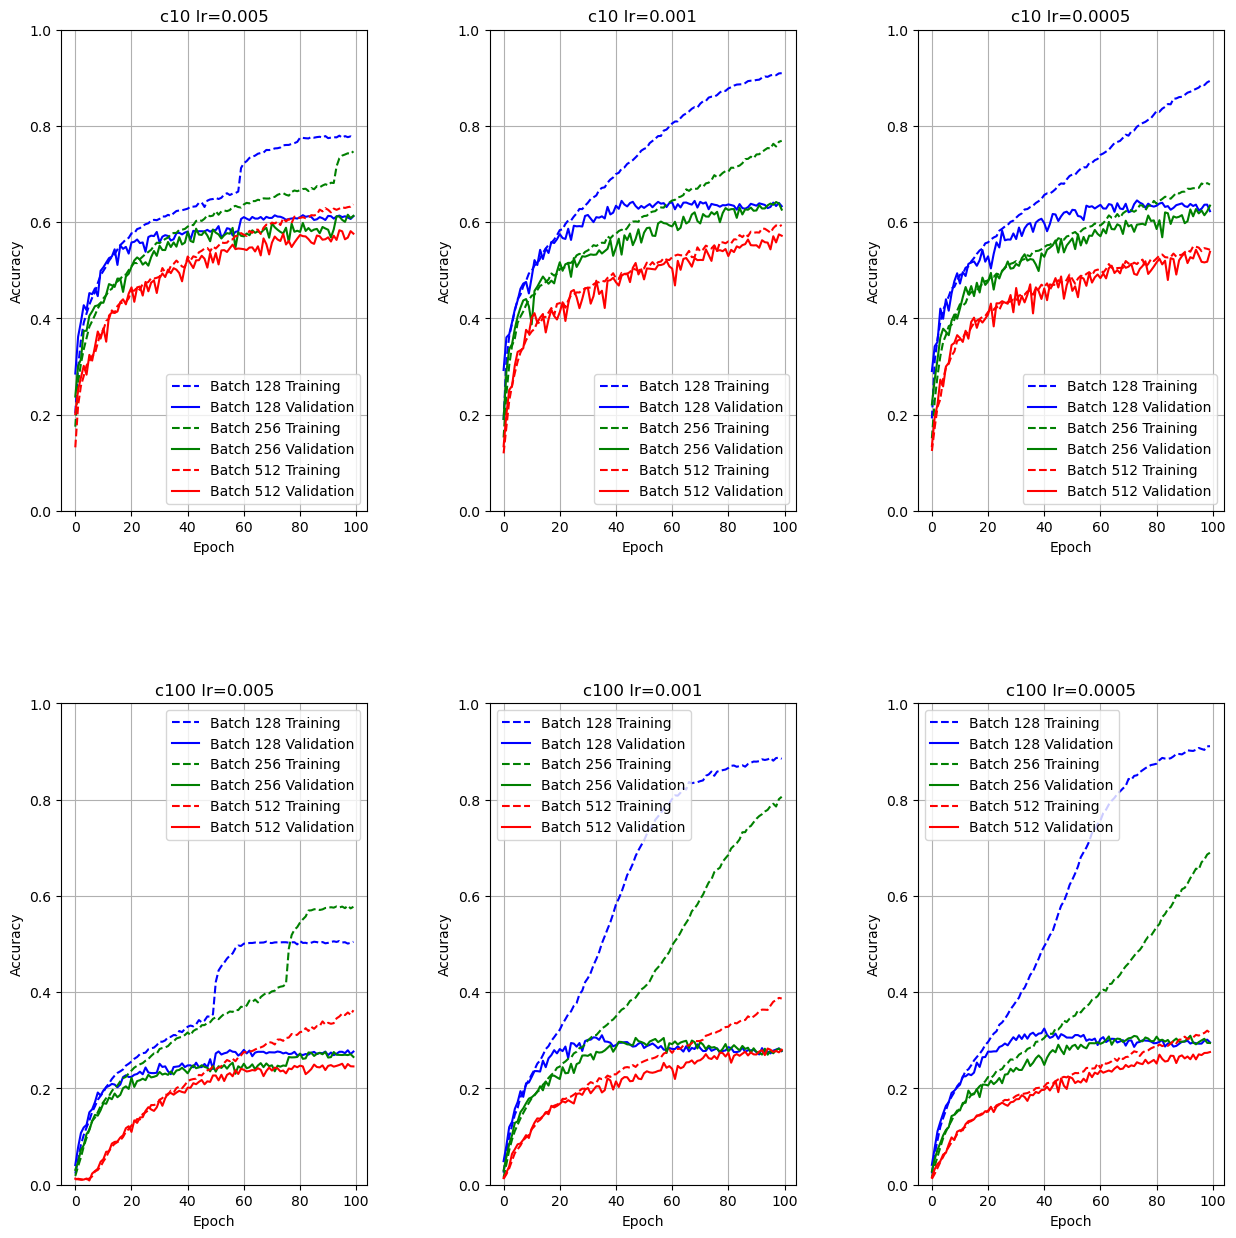

In [3]:
# Definisci i parametri
datasets = ['c10', 'c100']
learning_rates = ['0.005', '0.001', '0.0005']
batch_sizes = ['128', '256', '512']
colors = {'128': 'blue', '256': 'green', '512': 'red'}  # Mappa batch size a colori

# Crea una figura e una griglia di subplot 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Aggiusta lo spazio tra i grafici

# Contatore per posizionare correttamente i subplot
subplot_counter = 0

for dataset in datasets:
    for lr in learning_rates:
        # Seleziona l'asse corrente basato sul contatore
        ax = axs[subplot_counter // 3, subplot_counter % 3]
        
        for batch_size in batch_sizes:
            # Costruisci il nome del file
            file_name = f'./results/results_{dataset}_lr{lr}_batch{batch_size}.csv'
            
            # Leggi i dati
            data = pd.read_csv(file_name)
            
            # Estrai le metriche e traccia il grafico
            # Usa il dizionario dei colori per selezionare il colore in base alla batch size
            color = colors[batch_size]  # Seleziona il colore dalla mappa
            ax.plot(data['Epoch'], data['Training Accuracy'], label=f'Batch {batch_size} Training', color=color, linestyle='dashed')
            ax.plot(data['Epoch'], data['Validation Accuracy'], label=f'Batch {batch_size} Validation', color=color)
        
        # Imposta titolo, etichette e legenda per l'asse corrente
        ax.set_ylim([0, 1])
        ax.set_title(f'{dataset} lr={lr}')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid()
        
        # Incrementa il contatore per il prossimo subplot
        subplot_counter += 1

# Mostra il grafico
plt.show()

C:\Users\leona\AppData\Local\Temp\ipykernel_15080\2153843861.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right")  # Ruota le etichette e allinea a destra
C:\Users\leona\AppData\Local\Temp\ipykernel_15080\2153843861.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha="right")  # Ruota le etichette e allinea a destra


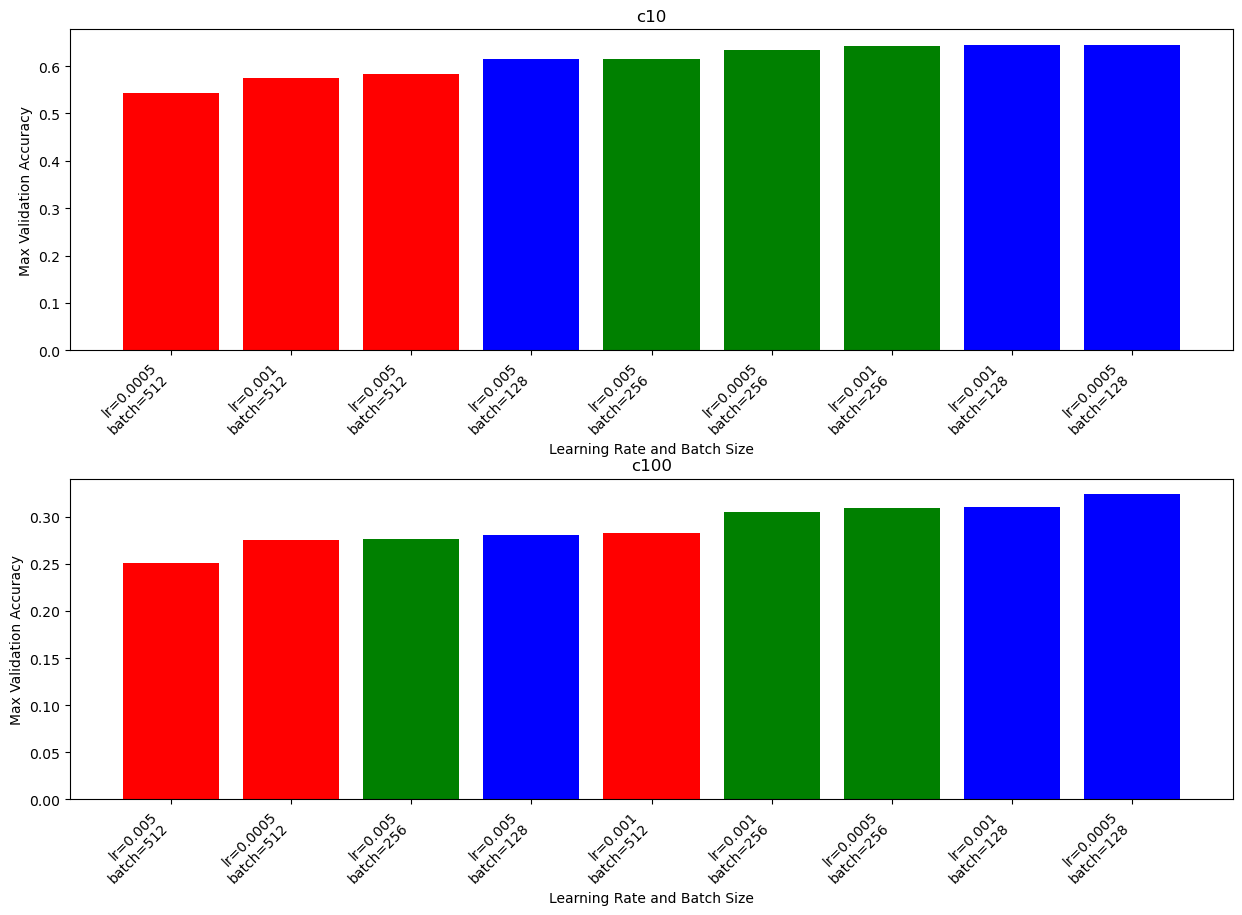

In [6]:
# 2 barplot per il confronto tra i max della valid accuracy per ogni lr e per ogni batch size, uno per ogni dataset
fig, axs = plt.subplots(2, 1, figsize=(15, 10))  # Aumenta la larghezza del grafico
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Aggiusta lo spazio tra i grafici

for index, dataset in enumerate(datasets):
    # Seleziona l'asse corrente basato sul contatore
    ax = axs[index]
    
    # Crea una lista vuota per memorizzare i massimi, le etichette e le batch size
    max_values_with_labels_and_batch = []
    
    for lr in learning_rates:
        for batch_size in batch_sizes:
            # Costruisci il nome del file
            file_name = f'./results/results_{dataset}_lr{lr}_batch{batch_size}.csv'
            
            # Leggi i dati
            data = pd.read_csv(file_name)
            
            # Estrai il massimo della valid accuracy e aggiungilo alla lista con l'etichetta corrispondente
            max_val = data['Validation Accuracy'].max()
            label = f'lr={lr}\nbatch={batch_size}'
            max_values_with_labels_and_batch.append((max_val, label, batch_size))
    
    # Ordina la lista in base ai valori di valid accuracy
    max_values_with_labels_and_batch.sort()
    
    # Separa i valori, le etichette e le batch size
    max_values = [val for val, _, _ in max_values_with_labels_and_batch]
    labels = [label for _, label, _ in max_values_with_labels_and_batch]
    batch_sizes_for_colors = [batch for _, _, batch in max_values_with_labels_and_batch]
    
    # Traccia il barplot con i colori specificati
    bar_colors = [colors[batch] for batch in batch_sizes_for_colors]  # Seleziona i colori in base alla batch size
    ax.bar(labels, max_values, color=bar_colors)
    
    # Imposta titolo, etichette e legenda per l'asse corrente
    ax.set_title(f'{dataset}')
    ax.set_xlabel('Learning Rate and Batch Size')
    ax.set_ylabel('Max Validation Accuracy')
    
    # Ruota le etichette dell'asse x per migliorare la leggibilità
    ax.set_xticklabels(labels, rotation=45, ha="right")  # Ruota le etichette e allinea a destra

# Mostra il grafico
plt.show()

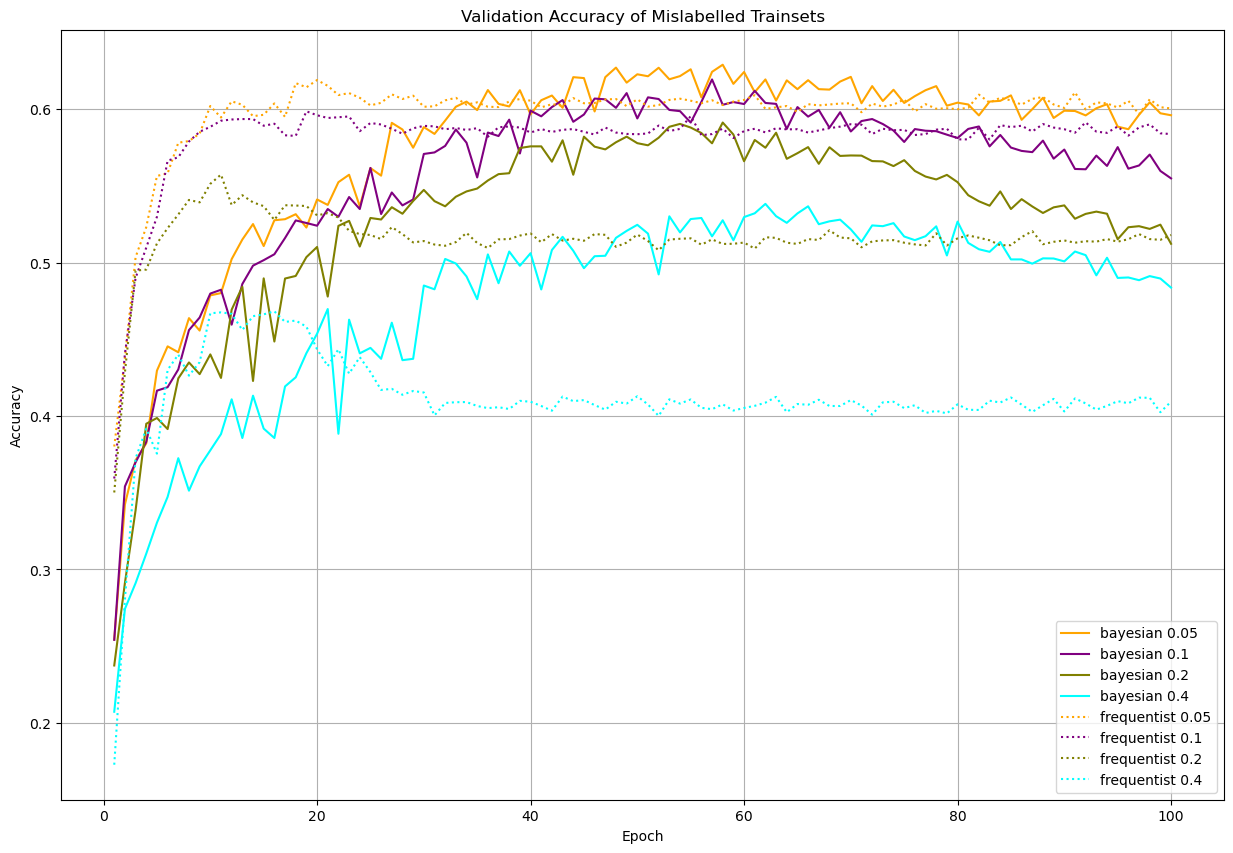

In [38]:
# Define parameters
mislabel_perc = ['0.05', '0.1', '0.2', '0.4']
cnns = ['bayesian', 'frequentist']
linestyles = {'bayesian': 'solid', 'frequentist': 'dotted'}
colors = {'0.05': 'orange', '0.1': 'purple', '0.2': 'olive', '0.4': 'cyan'}

# Create a figure
fig, ax = plt.subplots(figsize=(15, 10))

for cnn in cnns:
    for perc in mislabel_perc:
        # Build the file name
        file_name = f'./mislabel_results/results_{cnn}_mislabel_{perc}.csv'
            
        # Read the data
        data = pd.read_csv(file_name)
            
        # Extract metrics and plot
        color = colors[perc]  # Select color from the map
        linestyle = linestyles[cnn]
        ax.plot(data['Epoch']+1, data['Validation Accuracy'], label=f'{cnn} {perc}', color=color, linestyle=linestyle)
        
# Set title, labels, and legend
#ax.set_ylim([0.15, 0.65])
ax.set_title('Validation Accuracy of Mislabelled Trainsets')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid()

# Show the plot
plt.show()

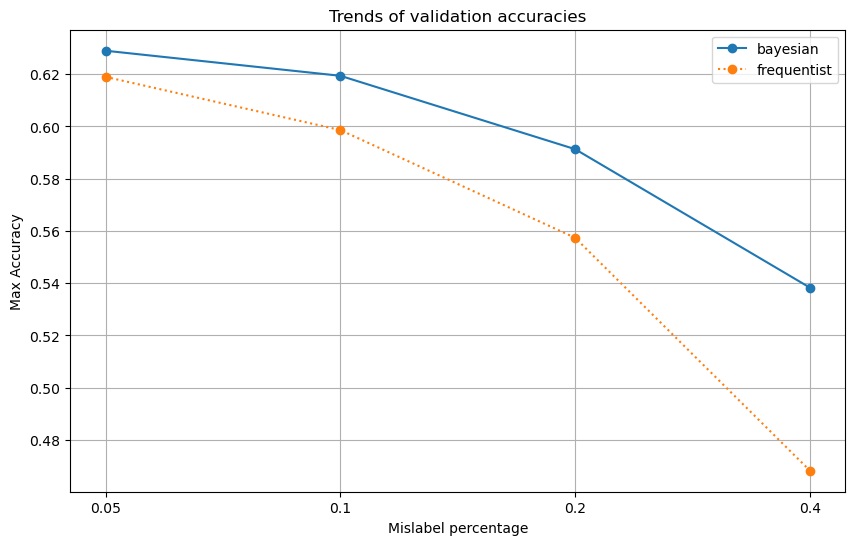

In [40]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Get max values for each kind of CSV file and plot them
for cnn in cnns:
    max_values = []
    for perc in mislabel_perc:
        file_name = f'./mislabel_results/results_{cnn}_mislabel_{perc}.csv'
        data = pd.read_csv(file_name)
        max_value = data['Validation Accuracy'].max()  
        max_values.append(max_value)
    linestyle = linestyles[cnn]
    ax.plot(mislabel_perc, max_values, marker='o', label=f'{cnn}', linestyle=linestyle)  # Plot the max values

# Set the title, labels, and legend
ax.set_title('Trends of validation accuracies')
ax.set_xlabel('Mislabel percentage')
ax.set_ylabel('Max Accuracy')
ax.legend()
ax.grid()

# Show the plot
plt.show()